# Import Packages

In [1]:
import os
import time
import pandas as pd
from pandas import ExcelWriter
import pickle
import imblearn
import numpy as np
import sklearn
import copy
from pandasql import *
from pandasql import sqldf
from mlens.visualization import corrmat
sql = lambda q: sqldf(q, globals()) 

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy import interp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, f1_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix,f1_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score, make_scorer

from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.set_option('display.float_format', lambda x: '%.f' %x)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)  
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,8

print('This file is located in the following directory: \n'+os.getcwd())

[MLENS] backend: threading


This file is located in the following directory: 
/Users/Work/Desktop/Work/Projects/Python


/Users/Work/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load Data

In [19]:
data = pd.ExcelFile('/Users/Work/Desktop/Work/Projects/Datasets/Analytics_Exercise___Case_Study.xlsx')
traffic     = pd.read_excel(data,sheet_name="Traffic")
market      = pd.read_excel(data,sheet_name="Market")
sales       = pd.read_excel(data,sheet_name="Sales Report")
sku         = pd.read_excel(data,sheet_name="SKUs")
media_spend = pd.read_excel(data,sheet_name="Media Spend")

# Initial EDA

In [22]:
traffic.head(2)
market.head(2)
sales.head(2)
sku.head(2)
media_spend.head(2)

,Date,Visitors,Visits,Page Views
0,2008-01-01,110318,143414,165477
1,2008-01-01,111056,144372,166583


,Date,Visits to competitor sites,Social Media Mentions
0,2008-01-01 00:00:00,1216161,210225
1,2008-01-02 00:00:00,1322513,231825


,Date,Transaction ID (Unique),SKU
0,2008-01-01,1001,102
1,2008-01-01,1002,102


,SKU,Product Name,Value,Beginning Inventory
0,101,Pineappple Express 1G,50,2518
1,102,Fruit Punch - 100 MG,200,2676


,Date,GRP (OOH),PPC Spend,Display Spend,email Spend
0,2008-01-01,118500,1890.000,1491,1275.000
1,2008-01-02,82500,2272.500,1272,720.000


In [24]:
traffic.describe()
market.describe()
sales.describe()
sku.describe()
media_spend.describe()

,Visitors,Visits,Page Views
count,8043.000,8043.000,8043.000
mean,105406.789,137028.832,158110.201
std,5097.501,6626.741,7646.236
min,85840.000,111592.000,128760.000
25%,102879.000,133742.500,154318.500
50%,105761.000,137489.000,158641.000
75%,108575.500,141148.000,162863.000
max,117766.000,153096.000,176649.000


,Visits to competitor sites,Social Media Mentions
count,728.000,728.000
mean,2599257.000,907169.547
std,35018399.623,12222390.278
min,491527.000,159950.000
25%,1149532.500,332020.000
50%,1306498.000,442165.000
75%,1458291.250,571066.250
max,946129548.000,330209715.000


,Transaction ID (Unique),SKU
count,8043.000,8043.000
mean,6023.911,104.834
std,2897.791,3.185
min,1001.000,101.000
25%,3503.500,102.000
50%,6078.000,104.000
75%,8522.500,108.000
max,10998.000,110.000


,SKU,Value,Beginning Inventory
count,10.000,10.000,10.000
mean,105.500,62.500,1185.600
std,3.028,51.330,873.155
min,101.000,25.000,124.000
25%,103.250,32.500,561.000
50%,105.500,50.000,1010.000
75%,107.750,68.750,1589.000
max,110.000,200.000,2676.000


,GRP (OOH),PPC Spend,Display Spend,email Spend
count,731.000,731.000,731.000,731.000
mean,64929.549,1061.943,1255.930,347.743
std,50459.826,763.398,145.099,255.006
min,0.000,0.000,1000.000,0.000
25%,9250.000,161.250,1133.500,50.000
50%,62500.000,1038.750,1261.000,335.000
75%,103750.000,1665.000,1377.000,547.500
max,201000.000,3825.000,1500.000,1275.000


# Missing Value Check - None Found

In [27]:
pd.DataFrame(traffic.isnull().sum(),columns=['Nulls'])
pd.DataFrame(market.isnull().sum(),columns=['Nulls'])
pd.DataFrame(sales.isnull().sum(),columns=['Nulls'])
pd.DataFrame(sku.isnull().sum(),columns=['Nulls'])
pd.DataFrame(media_spend.isnull().sum(),columns=['Nulls'])

,Nulls
Date,0
Visitors,0
Visits,0
Page Views,0


,Nulls
Date,0
Visits to competitor sites,0
Social Media Mentions,0


,Nulls
Date,0
Transaction ID (Unique),0
SKU,0


,Nulls
SKU,0
Product Name,0
Value,0
Beginning Inventory,0


,Nulls
Date,0
GRP (OOH),0
PPC Spend,0
Display Spend,0
email Spend,0


# Data Prep

## Aggregate traffic data to daily level.

In [20]:
traffic['Date'].value_counts(ascending=False).head() # Multiple rows per date value
traffic2=traffic.groupby(['Date']).sum() #aggregates data to daily level
pd.Series(traffic2.index).value_counts(ascending=False).head(1) #verifies 1 row per date
traffic2=traffic2.reset_index()

2008-01-08    20
2009-04-25    14
2009-04-28    14
2009-02-08    14
2009-02-16    14
Name: Date, dtype: int64

2008-07-11    1
Name: Date, dtype: int64

## Aggregate sales data by summing sales by day and sku

In [21]:
#make each sku a column with aggregated sales for the date
sales2=pd.merge(sales,sku.iloc[:,:-1],on='SKU')
sales2=pd.DataFrame(sales2.groupby(['Date','SKU']).sum()).loc[:,['Value']]
sales2=sales2.unstack(1).fillna(0).reset_index()

#get rid of the multilevel column index
temp=pd.DataFrame(sales2.Date)
for j in range(len(sales2.columns.values)):
    temp[sales2.columns.values[j][1]]=sales2.iloc[:,j]
sales2=temp.drop("",axis=1)

In [392]:
media_spend.head(1)
media_spend.Date.value_counts(ascending=False).head(1) #check if dates are unique

,Date,GRP (OOH),PPC Spend,Display Spend,email Spend
0,2008-01-01,118500,1890.000,1491,1275.000


2008-07-11    1
Name: Date, dtype: int64

## Transform market data date column

In [22]:
market.Date.value_counts(ascending=False).head(1) #check if dates are unique
market2=copy.deepcopy(market)
market2['Date']=market['Date'].astype(str).str[:-8].str.rstrip(' ') #format dates
market2=market2.iloc[:-1,:] #remove grand total column
market2.Date.value_counts(ascending=False).head(1) #check if dates are unique
market2['Date']=pd.to_datetime(market2.Date)
#check if date length concatenating messed up any of the dates

2008-06-30    1
Name: Date, dtype: int64

2008-05-03    1
Name: Date, dtype: int64

# Check Data Prep

From the below, media_spend has several days 02/01/09 - 02/04/09 that are not in the other datasets.  These days will be removed.

In [23]:
# check that dates have same format
media_spend.Date.head(2)
market2.Date.head(2)
traffic2.Date.head(2)

#Check if some days are missing from certain dataframes; how many rows in each df?
len(sales2)
len(media_spend)
len(market2)
len(traffic2)

temp=media_spend.Date.isin(sales2.Date)
temp=temp[temp==False].index.values #media spend index rows not in sales2
media_spend.iloc[temp,:].Date #sales2 is missing 02-01-09 through 02-04-09

temp=media_spend.Date.isin(market2.Date)
temp=temp[temp==False].index.values #media spend index rows not in market2
media_spend.iloc[temp,:].Date #market2 is missing 02-01-09 through 02-04-09, AS WELL!

temp=media_spend.Date.isin(traffic2.Date)
temp=temp[temp==False].index.values #media spend index rows not in traffic2
media_spend.iloc[temp,:].Date #traffic2 is missing 02-01-09 through 02-04-09

media_spend2=media_spend.drop(temp) #remove media_spend days not in other datasets
len(media_spend2) #new number of rows
len(media_spend)  #old number of rows

len(media_spend2), len(traffic2), len(market2), len(sales2)
media_spend2.head(1)
traffic2.head(1)
market2.head(1)
sales2.head(1)

0   2008-01-01
1   2008-01-02
Name: Date, dtype: datetime64[ns]

0   2008-01-01
1   2008-01-02
Name: Date, dtype: datetime64[ns]

0   2008-01-01
1   2008-01-02
Name: Date, dtype: datetime64[ns]

727

731

727

727

397   2009-02-01
398   2009-02-02
399   2009-02-03
400   2009-02-04
Name: Date, dtype: datetime64[ns]

397   2009-02-01
398   2009-02-02
399   2009-02-03
400   2009-02-04
Name: Date, dtype: datetime64[ns]

397   2009-02-01
398   2009-02-02
399   2009-02-03
400   2009-02-04
Name: Date, dtype: datetime64[ns]

727

731

(727, 727, 727, 727)

,Date,GRP (OOH),PPC Spend,Display Spend,email Spend
0,2008-01-01,118500,1890.000,1491,1275.000


,Date,Visitors,Visits,Page Views
0,2008-01-01,1100599,1430780,1650898


,Date,Visits to competitor sites,Social Media Mentions
0,2008-01-01,1216161,210225


,Date,101,102,103,104,105,106,107,108,109,110
0,2008-01-01,250.000,600.000,150.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Combine Datasets

### Monthly

In [81]:
df=pd.merge(media_spend2,traffic2,on='Date')
df=pd.merge(df,market2,on='Date')
df=pd.merge(df,sales2,on='Date')

df_tableau=copy.deepcopy(df)
df['Day']  =df.Date.map(lambda x: x.day)
df['Month']=df.Date.map(lambda x: x.month)
df['Year'] =df.Date.map(lambda x: x.year)

cols=df.columns.tolist() #make a list out of column values
cols1=[cols[-3]]+[cols[-2]]+[cols[-1]]+cols[1:(len(cols)-3)]
cols2=[cols[-2]]+[cols[-1]]+cols[1:(len(cols)-3)] #move month/year to front, remove date
df=df[cols1]
df_month=df[cols2].groupby(['Month','Year']).sum().reset_index().sort_values(by=['Year','Month']).reset_index().drop('index',axis=1)

### Bi-Monthly

In [693]:
df_bi_month = copy.deepcopy(df)
df_bi_month['Bi_Month'] = df_bi_month.Day.map(lambda x: 1 if x <=15 else 2 )
cols_bi=df_bi_month.columns.tolist()
cols3=[cols_bi[-1]]+cols_bi[1:(len(cols_bi)-1)] #move month/year to front, remove Day
df_bi_month_non_aggregated = df_bi_month[cols3]
df_bi_month = df_bi_month_non_aggregated.groupby(['Bi_Month','Month','Year']).sum().reset_index().sort_values(by=['Year','Month','Bi_Month']).reset_index().drop('index',axis=1)

## Creating Total Revenue Datasets

### Monthly

In [37]:
df_month.columns=df_month.columns.astype(str)
temp1=df_month.columns.get_loc('101') #starting SKU index
temp2=df_month.columns.get_loc('110') #ending SKU index
temp3=df_month.iloc[:,temp1:temp2+1].sum(axis=1) #total revenue by month
temp4=df_month.iloc[:,:temp1] #df_month excluding revenues
temp4['Sales'] = temp3
df_month_total_revenue = temp4

In [83]:
df_tableau.columns=df_tableau.columns.astype(str)
temp1=df_tableau.columns.get_loc('101') #starting SKU index
temp2=df_tableau.columns.get_loc('110') #ending SKU index
temp3=df_tableau.iloc[:,temp1:temp2+1].sum(axis=1) #total revenue by month
temp4=df_tableau.iloc[:,:temp1] #df_month excluding revenues
temp4['Sales'] = temp3
mm_tableau = temp4
mm_tableau.to_csv('/Users/Work/Desktop/Work/Projects/Python/mm_tableau.csv')

### Bi_Monthly

In [714]:
df_bi_month.columns=df_bi_month.columns.astype(str)
temp1=df_bi_month.columns.get_loc('101') #starting SKU index
temp2=df_bi_month.columns.get_loc('110') #ending SKU index
temp3=df_bi_month.iloc[:,temp1:temp2+1].sum(axis=1) #total revenue by month
temp4=df_bi_month.iloc[:,:temp1] #df_bi_month excluding revenues
temp4['Sales'] = temp3
df_bi_month_total_revenue = temp4

# Working with Monthly Total Revenue as the Outcome

In [561]:
pickle.dump(df_month_total_revenue, open('mm_df_month_total_revenue.sav', 'wb'))

In [3]:
df_month_total_revenue = pickle.load(open('mm_df_month_total_revenue.sav', 'rb'))

In [553]:
df_month_total_revenue.drop(['Month','Year'],axis=1).describe()

,GRP (OOH),PPC Spend,Display Spend,email Spend,Visitors,Visits,Page Views,Visits to competitor sites,Social Media Mentions,Sales
count,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000
mean,1956083.333,32345.000,38037.333,10443.229,35324450.250,45921787.458,52986681.083,39422064.500,13758738.125,26169.792
std,1383838.242,21503.212,1784.012,6327.880,2590683.246,3367884.399,3886020.393,2424058.864,3746972.987,8125.009
min,0.000,3337.500,31280.000,1165.000,28692638.000,37300438.000,43038963.000,35368174.000,7790475.000,17700.000
25%,340125.000,17467.500,37450.500,5665.938,33944380.750,44127698.500,50916590.500,37910809.250,10627485.000,19341.250
50%,1678125.000,32075.625,38664.500,10108.125,35020807.000,45527060.000,52531220.000,38942445.000,14017207.500,23675.000
75%,2833875.000,47176.875,39180.500,15838.125,36558925.000,47526596.750,54838393.500,40572939.000,16411230.000,31431.250
max,4149000.000,64327.500,39990.000,21375.000,41105720.000,53437435.000,61658570.000,45421813.000,20327840.000,41025.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110f9a410>,
      dtype=object)

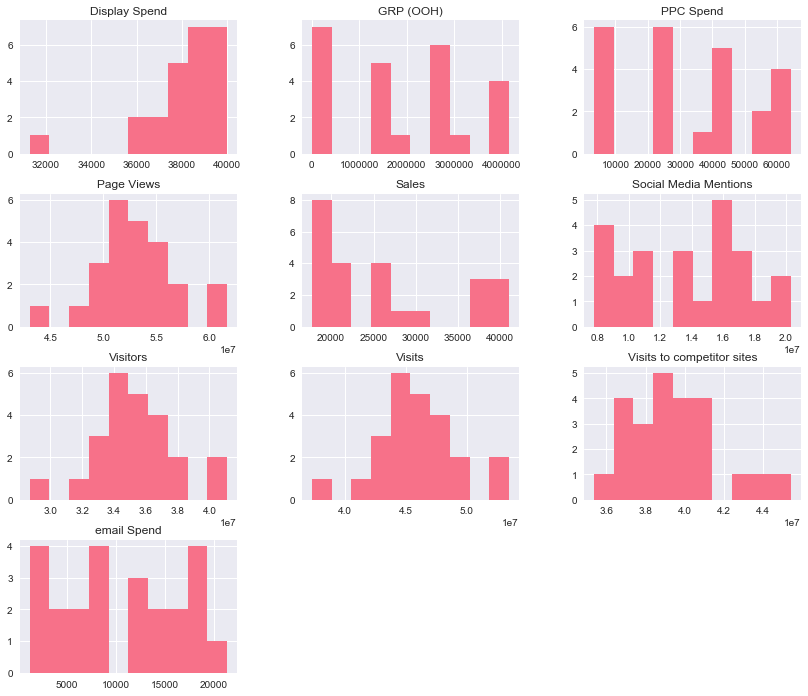

In [552]:
df_month_total_revenue.drop(['Year','Month'],axis=1).hist(figsize=(14,12))

GRP (OOH)                         Axes(0.125,0.71587;0.227941x0.16413)
PPC Spend                      Axes(0.398529,0.71587;0.227941x0.16413)
Display Spend                  Axes(0.672059,0.71587;0.227941x0.16413)
email Spend                      Axes(0.125,0.518913;0.227941x0.16413)
Visitors                      Axes(0.398529,0.518913;0.227941x0.16413)
Visits                        Axes(0.672059,0.518913;0.227941x0.16413)
Page Views                       Axes(0.125,0.321957;0.227941x0.16413)
Visits to competitor sites    Axes(0.398529,0.321957;0.227941x0.16413)
Social Media Mentions         Axes(0.672059,0.321957;0.227941x0.16413)
Sales                               Axes(0.125,0.125;0.227941x0.16413)
dtype: object

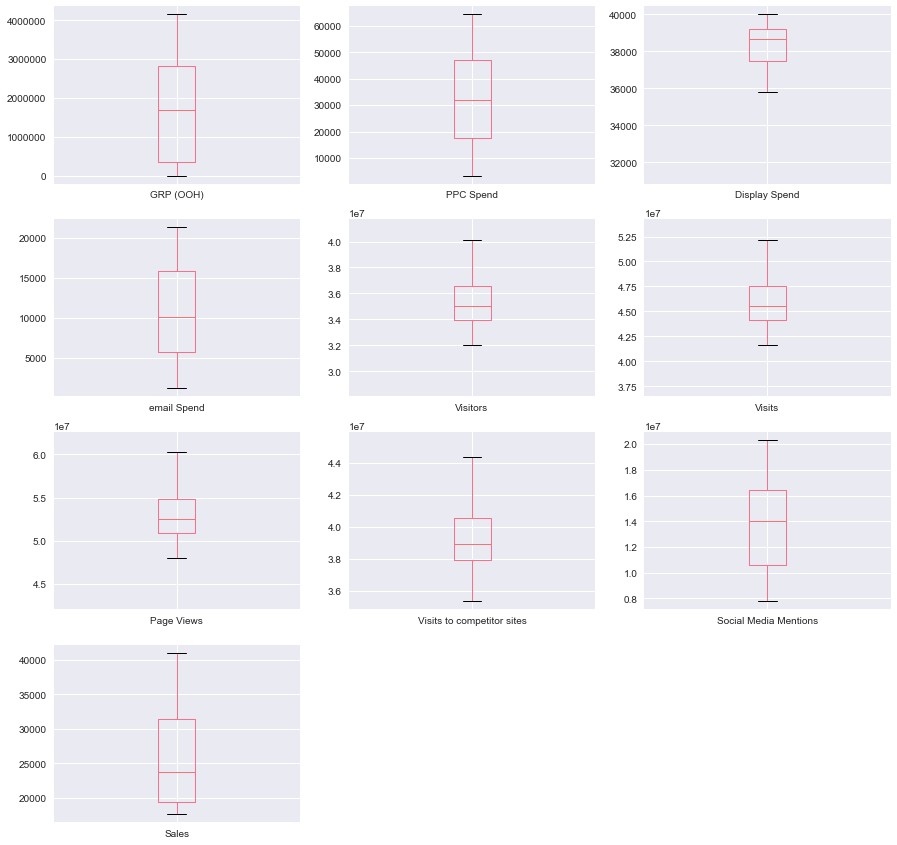

In [555]:
df_month_total_revenue.drop(['Year','Month'],axis=1).plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False,figsize=(15,15))

In [557]:
df_month_total_revenue.corr(method='pearson')['Sales'].sort_values(ascending=False).drop(['Sales'])

PPC Spend                     0.934
email Spend                   0.910
Page Views                    0.784
Visitors                      0.784
Visits                        0.784
Visits to competitor sites    0.767
GRP (OOH)                     0.562
Year                          0.005
Display Spend                -0.120
Social Media Mentions        -0.152
Month                        -0.504
Name: Sales, dtype: float64

There appears to be strong multicollinearity, since many predictors are positively correlated with one another.

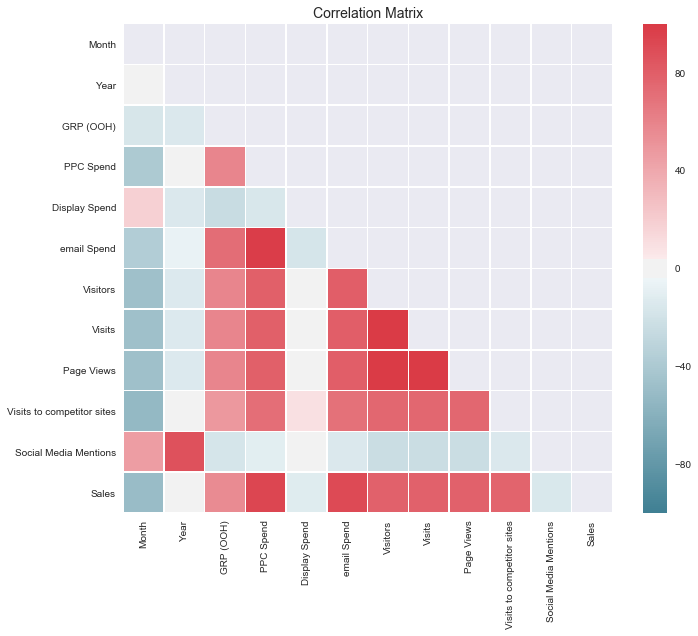

In [560]:
sns.set(style="white") #this whites out the upper-right section of the matrix
corrmat(df_month_total_revenue.corr(method='pearson'),annotate=False)
#set annotate = True to show correlation values

## Feature Importances - Predicting Monthly Revenue

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<Container object of 11 artists>

([<matplotlib.axis.XTick at 0x11a09c710>,
 <a list of 11 Text xticklabel objects>)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<Container object of 11 artists>

([<matplotlib.axis.XTick at 0x11b6ca710>,
 <a list of 11 Text xticklabel objects>)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<Container object of 11 artists>

([<matplotlib.axis.XTick at 0x11b7993d0>,
 <a list of 11 Text xticklabel objects>)

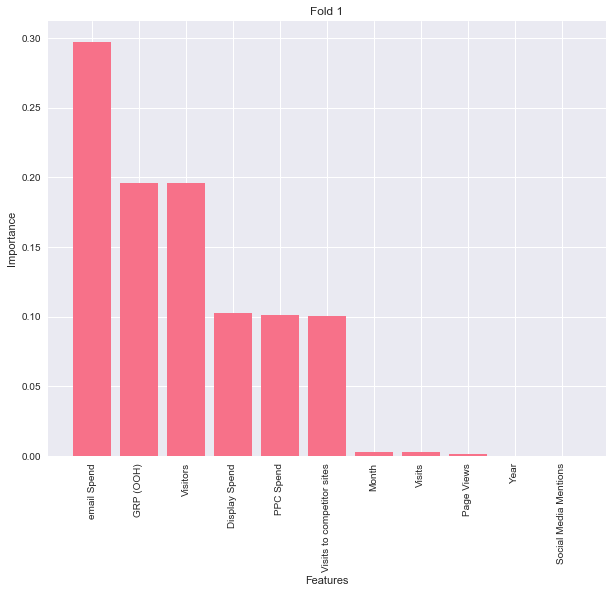

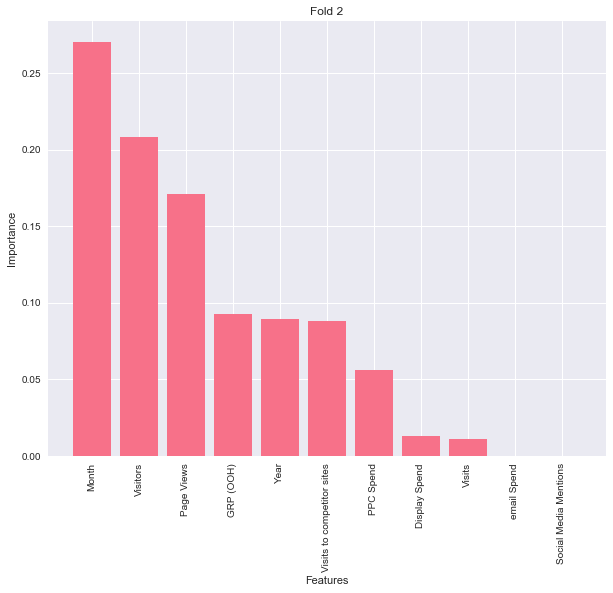

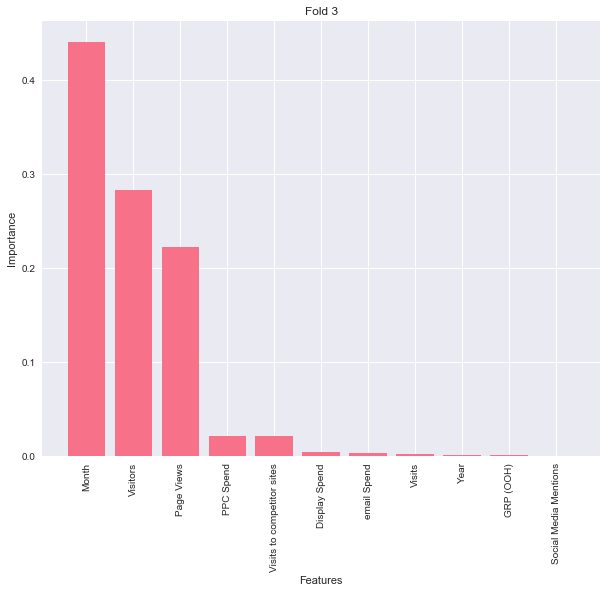

In [9]:
from sklearn.model_selection import TimeSeriesSplit
x=df_month_total_revenue.drop('Sales',axis=1)
y=df_month_total_revenue.iloc[:,-1]

feature_names = x.columns.values
tss=TimeSeriesSplit(n_splits=3, max_train_size=None)
rf = RandomForestRegressor(random_state=0)
count = 1

# test data is not needed for fitting
for train, _ in tss.split(x, y):
    rf.fit(x.iloc[train, :], y[train])
    # sort the feature index by importance score in descending order
    importances_index_desc = np.argsort(rf.feature_importances_)[::-1]
    feature_labels = [feature_names[-i] for i in importances_index_desc]
    x_index = np.arange(len(feature_labels))

    # plot
    plt.figure()
    plt.bar(x_index,rf.feature_importances_[importances_index_desc])
    plt.xticks(x_index, feature_labels, rotation='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Fold {}'.format(count))
    count = count + 1
plt.show()

## Feature Importances - Scaled - Predicting Monthly Revenue

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<Container object of 11 artists>

([<matplotlib.axis.XTick at 0x11b760290>,
 <a list of 11 Text xticklabel objects>)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<Container object of 11 artists>

([<matplotlib.axis.XTick at 0x11aaec390>,
 <a list of 11 Text xticklabel objects>)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<Container object of 11 artists>

([<matplotlib.axis.XTick at 0x119f06a90>,
 <a list of 11 Text xticklabel objects>)

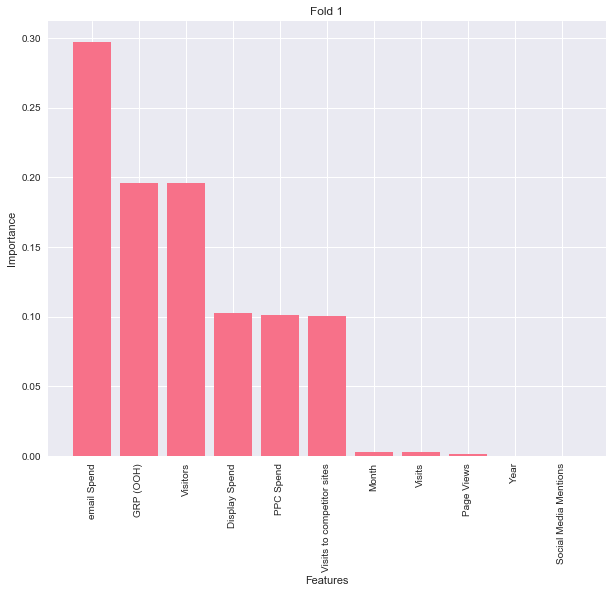

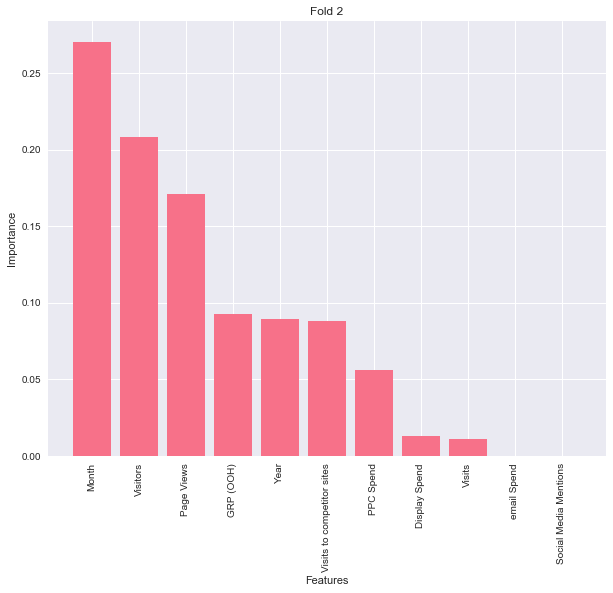

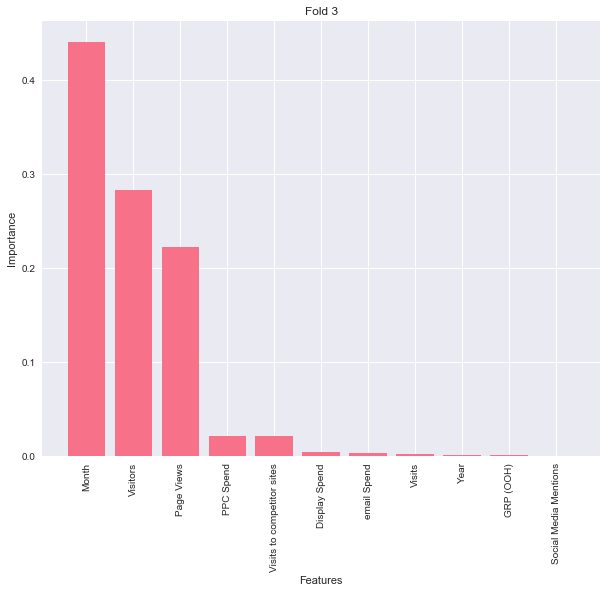

In [10]:
from sklearn.model_selection import TimeSeriesSplit
x=df_month_total_revenue.drop('Sales',axis=1)
y=df_month_total_revenue.iloc[:,-1]

scaler = MinMaxScaler()
feature_names = x.columns.values
tss=TimeSeriesSplit(n_splits=3, max_train_size=None)
rf = RandomForestRegressor(random_state=0)
count = 1

# test data is not needed for fitting
for train, _ in tss.split(x, y):
    x_train_scaled = pd.DataFrame(scaler.fit_transform(x.iloc[train, :]), columns = feature_names )
    rf.fit(x_train_scaled, y[train])
    # sort the feature index by importance score in descending order
    importances_index_desc = np.argsort(rf.feature_importances_)[::-1]
    feature_labels = [feature_names[-i] for i in importances_index_desc]
    x_index = np.arange(len(feature_labels))

    # plot
    plt.figure()
    plt.bar(x_index,rf.feature_importances_[importances_index_desc])
    plt.xticks(x_index, feature_labels, rotation='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Fold {}'.format(count))
    count = count + 1
plt.show()

## Linear Regression - Predicting Monthly Revenue

Warning errors likely due to strong multicollinearity make me worried here.  

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

clf_lr  = LinearRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
rmse(y_test,y_pred)

In [645]:
from sklearn.model_selection import TimeSeriesSplit
x=df_month_total_revenue.drop('Sales',axis=1)
y=df_month_total_revenue.iloc[:,-1]

feature_names = x.columns.values
x_index = np.arange(len(feature_labels))
tss=TimeSeriesSplit(n_splits=3, max_train_size=None)
lr = LinearRegression()

# test data is not needed for fitting
for train, _ in tss.split(x, y):
    X_train = x.iloc[train, :]
    y_train = y[train]
    m = ols('y_train ~ X_train', X_train).fit()
    print m.summary()

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 27 Nov 2018   Prob (F-statistic):                nan
Time:                        15:22:57   Log-Likelihood:                 87.418
No. Observations:                   6   AIC:                            -162.8
Df Residuals:                       0   BIC:                            -164.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0037        inf         -0      

/Users/Work/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/Work/anaconda/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: divide by zero encountered in divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/Work/anaconda/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/Work/anaconda/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/Work/anaconda/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning

# Working with Bi-Monthly Total Revenue as the Outcome

In [716]:
pickle.dump(df_bi_month_total_revenue, open('mm_bi_df_month_total_revenue.sav', 'wb'))

In [92]:
df_bi_month_total_revenue

,Bi_Month,Month,Year,GRP (OOH),PPC Spend,Display Spend,email Spend,Visitors,Visits,Page Views,Visits to competitor sites,Social Media Mentions,Sales
0,1,1,2008,1974000,31860.000,19422,10710.000,19598266,25477739,29397396,21656077,3834055,19500.000
1,2,1,2008,1984500,32467.500,19819,10665.000,20536053,26696859,30804069,22692332,4194750,21525.000
2,1,2,2008,1951500,29610.000,18125,9667.500,18842855,24495710,28264292,20821358,4016195,20100.000
3,2,2,2008,2002500,26910.000,17670,8767.500,17151637,22297128,25727460,18952565,3774280,16300.000
4,1,3,2008,596000,27765.000,18987,10320.000,16922910,21999789,25384384,18699813,3947970,16450.000
5,2,3,2008,940500,34402.500,19669,7323.750,20211534,26274987,30317297,22333741,4883475,20875.000
6,1,4,2008,801250,8940.000,19564,3851.250,15477831,20121182,23216747,17103000,3902115,8240.000
7,2,4,2008,756000,13065.000,18179,4405.000,19468727,25309354,29203099,21512955,5092215,10620.000
8,1,5,2008,804000,11925.000,19136,3782.500,16668455,21668997,25002689,18418644,4576095,10270.000
9,2,5,2008,818750,12476.250,20052,4097.500,17802134,23142772,26703198,19671352,5031705,11140.000


In [12]:
df_bi_month_total_revenue = pickle.load(open('mm_bi_df_month_total_revenue.sav', 'rb'))

In [13]:
df_bi_month_total_revenue.drop(['Bi_Month','Month','Year'],axis=1).describe()

,GRP (OOH),PPC Spend,Display Spend,email Spend,Visitors,Visits,Page Views,Visits to competitor sites,Social Media Mentions,Sales
count,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000
mean,978041.667,16172.500,19018.667,5221.615,17662225.125,22960893.729,26493340.542,19711032.250,6879369.062,13084.896
std,692156.293,10734.008,1126.677,3248.255,1804441.689,2345772.558,2706660.917,1847710.538,1934041.310,4149.288
min,0.000,1552.500,14057.000,535.000,13940094.000,18122119.000,20910139.000,16355487.000,3774280.000,8240.000
25%,189000.000,7219.688,18406.000,3444.688,16488369.750,21434878.500,24732548.500,18303421.750,5113500.000,9798.750
50%,912750.000,15639.375,18966.500,4658.750,17562895.000,22831759.500,26344339.500,19472150.500,6947190.000,11340.000
75%,1472750.000,23850.000,19749.250,7446.875,18903801.500,24574942.250,28355708.750,21092087.500,8177295.000,15823.750
max,2298000.000,34402.500,21204.000,10710.000,21411305.000,27834696.000,32116955.000,23659491.000,10566585.000,21650.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11663e450>,
      dtype=object)

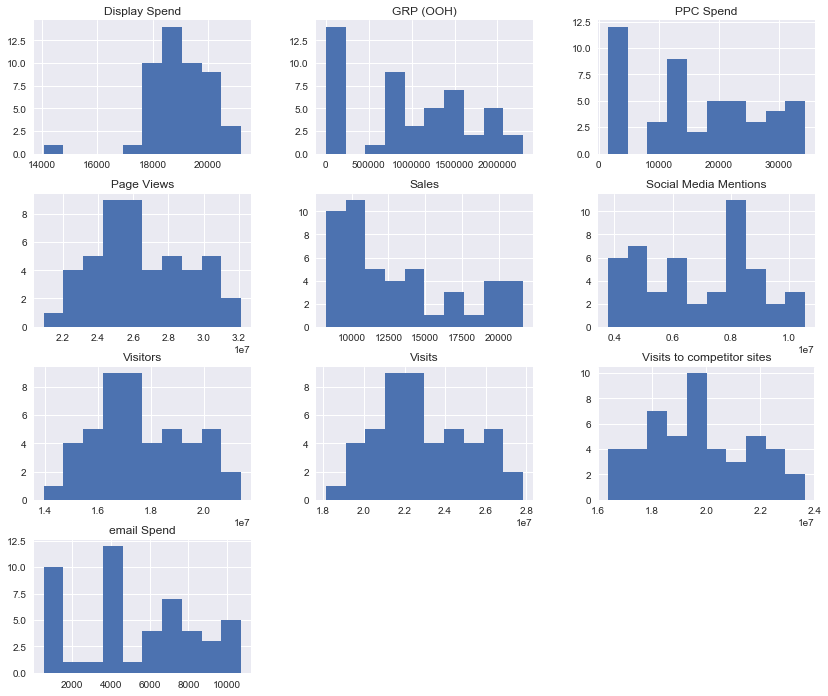

In [719]:
df_bi_month_total_revenue.drop(['Bi_Month','Year','Month'],axis=1).hist(figsize=(14,12))

GRP (OOH)                         Axes(0.125,0.71587;0.227941x0.16413)
PPC Spend                      Axes(0.398529,0.71587;0.227941x0.16413)
Display Spend                  Axes(0.672059,0.71587;0.227941x0.16413)
email Spend                      Axes(0.125,0.518913;0.227941x0.16413)
Visitors                      Axes(0.398529,0.518913;0.227941x0.16413)
Visits                        Axes(0.672059,0.518913;0.227941x0.16413)
Page Views                       Axes(0.125,0.321957;0.227941x0.16413)
Visits to competitor sites    Axes(0.398529,0.321957;0.227941x0.16413)
Social Media Mentions         Axes(0.672059,0.321957;0.227941x0.16413)
Sales                               Axes(0.125,0.125;0.227941x0.16413)
dtype: object

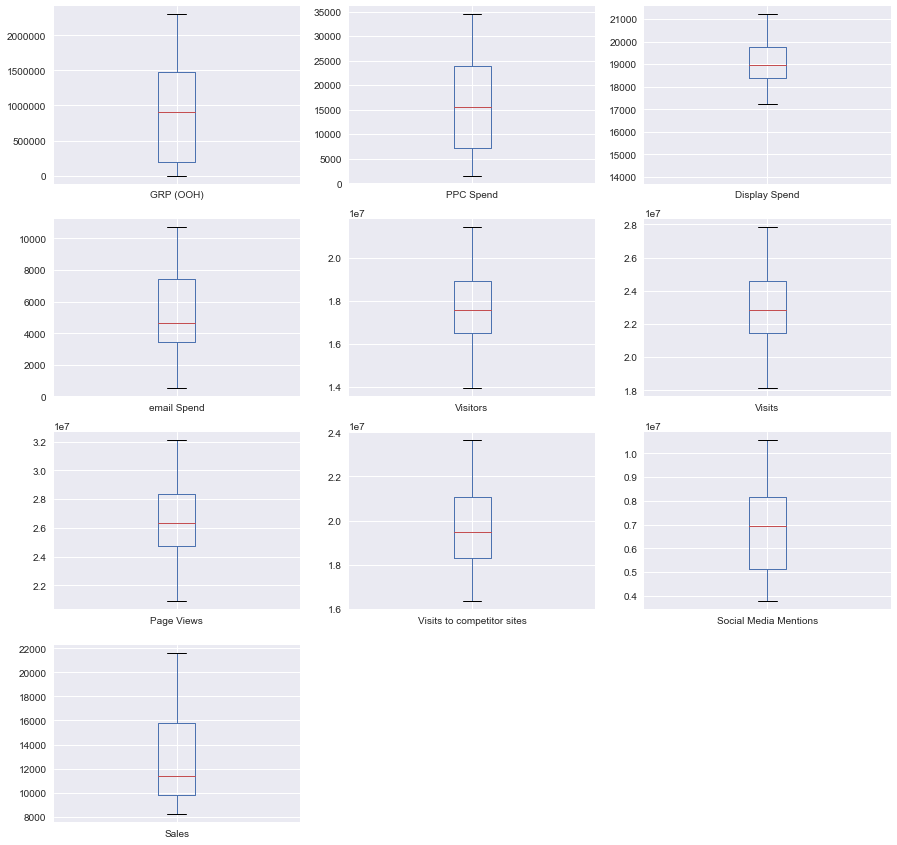

In [720]:
df_bi_month_total_revenue.drop(['Bi_Month','Year','Month'],axis=1).plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False,figsize=(15,15))

In [721]:
df_bi_month_total_revenue.corr(method='pearson')['Sales'].sort_values(ascending=False).drop(['Sales'])

PPC Spend                     0.925
email Spend                   0.841
Page Views                    0.690
Visitors                      0.690
Visits                        0.690
Visits to competitor sites    0.645
GRP (OOH)                     0.551
Bi_Month                      0.096
Year                          0.005
Display Spend                -0.020
Social Media Mentions        -0.084
Month                        -0.489
Name: Sales, dtype: float64

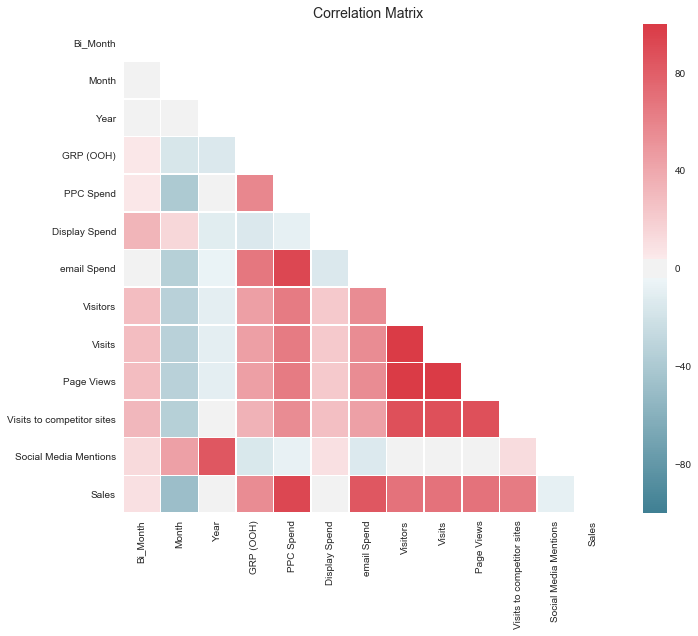

In [14]:
sns.set(style="white") #this whites out the upper-right section of the matrix
corrmat(df_bi_month_total_revenue.corr(method='pearson'),annotate=False)
#set annotate = True to show correlation values

## Feature Importances - Predicting Bi-Monthly Revenue

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<Container object of 12 artists>

([<matplotlib.axis.XTick at 0x118862bd0>,
 <a list of 12 Text xticklabel objects>)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<Container object of 12 artists>

([<matplotlib.axis.XTick at 0x1188f22d0>,
 <a list of 12 Text xticklabel objects>)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<Container object of 12 artists>

([<matplotlib.axis.XTick at 0x1189e6690>,
 <a list of 12 Text xticklabel objects>)

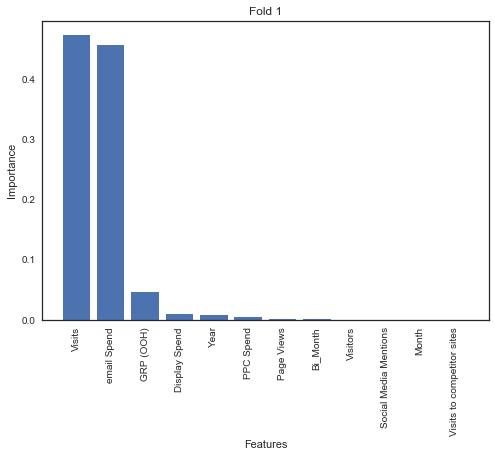

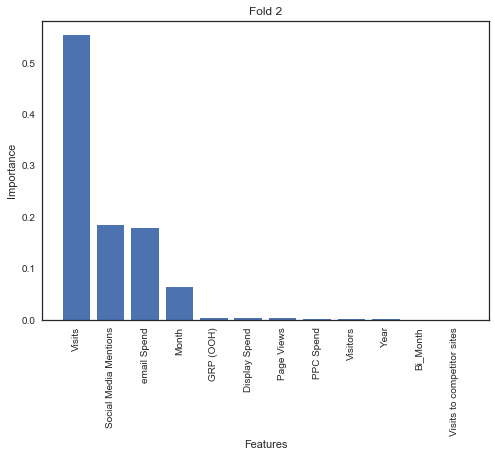

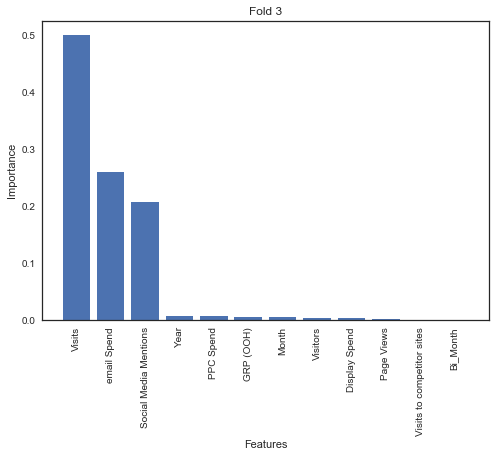

In [729]:
from sklearn.model_selection import TimeSeriesSplit
x=df_bi_month_total_revenue.drop('Sales',axis=1)
y=df_bi_month_total_revenue.iloc[:,-1]

feature_names = x.columns.values

tss=TimeSeriesSplit(n_splits=3, max_train_size=None)
rf = RandomForestRegressor(random_state=0)
count = 1

# test data is not needed for fitting
for train, _ in tss.split(x, y):
    rf.fit(x.iloc[train, :], y[train])
    # sort the feature index by importance score in descending order
    importances_index_desc = np.argsort(rf.feature_importances_)[::-1]
    feature_labels = [feature_names[-i] for i in importances_index_desc]
    x_index = np.arange(len(feature_labels))

    # plot
    plt.figure()
    plt.bar(x_index,rf.feature_importances_[importances_index_desc])
    plt.xticks(x_index, feature_labels, rotation='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Fold {}'.format(count))
    count = count + 1
plt.show()

## Feature Importances - Scaled - Predicting Bi-Monthly Revenue

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<Container object of 11 artists>

([<matplotlib.axis.XTick at 0x116ae8290>,
 <a list of 11 Text xticklabel objects>)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<Container object of 11 artists>

([<matplotlib.axis.XTick at 0x116c0c950>,
 <a list of 11 Text xticklabel objects>)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<Container object of 11 artists>

([<matplotlib.axis.XTick at 0x116573350>,
 <a list of 11 Text xticklabel objects>)

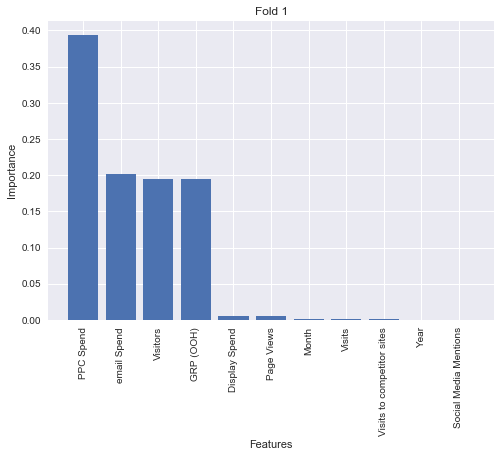

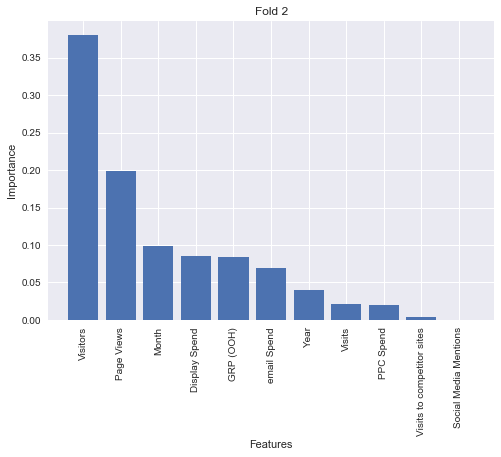

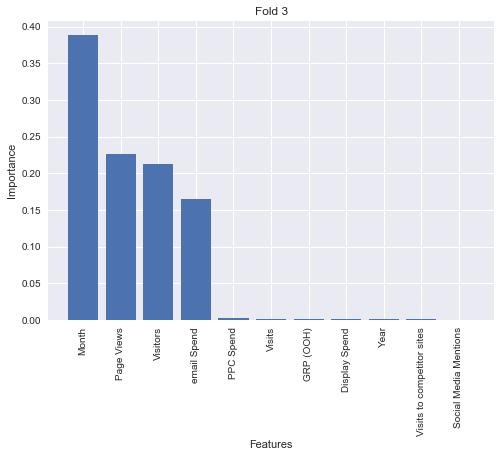

In [644]:
from sklearn.model_selection import TimeSeriesSplit
x=df_bi_month_total_revenue.drop('Sales',axis=1)
y=df_bi_month_total_revenue.iloc[:,-1]

scaler = MinMaxScaler()
feature_names = x.columns.values
x_index = np.arange(len(feature_labels))
tss=TimeSeriesSplit(n_splits=3, max_train_size=None)
rf = RandomForestRegressor(random_state=0)
count = 1

# test data is not needed for fitting
for train, _ in tss.split(x, y):
    x_train_scaled = pd.DataFrame(scaler.fit_transform(x.iloc[train, :]), columns = feature_names )
    rf.fit(x_train_scaled, y[train])
    # sort the feature index by importance score in descending order
    importances_index_desc = np.argsort(rf.feature_importances_)[::-1]
    feature_labels = [feature_names[-i] for i in importances_index_desc]

    # plot
    plt.figure()
    plt.bar(x_index,rf.feature_importances_[importances_index_desc])
    plt.xticks(x_index, feature_labels, rotation='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Fold {}'.format(count))
    count = count + 1
plt.show()